## Ensemble model
The ensemble combines five models:
1. best L1 value
2. best L2 value
3. augmented 
4. best dropout value 
5. best model architecture (TBD)

This notebook compares the ensemble performance to the individual models' performance.

Import packages

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score
import matplotlib.pyplot as plt
from numpy_ml.neural_nets.losses import CrossEntropy as np_CrossEntropy
from scipy.special import softmax
import torch
import pandas as pd
from preprocess import get_action

Load predictions and ground truth

In [2]:
models_path = "/home/jt9744/COS429/429_Final_new/ensemble_models/"
num_classes = 11 # from previous knowledge, e.g. check preprocess.ipynb
ground_truth = np.loadtxt(models_path+'TRUTH_30epochs_l1_lr_0.1_ld_0.0001').astype(np.int8) # all ground truths are the same
ensemble_preds = np.loadtxt(models_path+'PREDS_ensemble').astype(np.int8)
unique_labels = np.loadtxt("/home/jt9744/COS429/429_Final_new/labels/unique_labels")

Evaluate model performance

In [3]:
# dictionary containing the accuracy, precision, f1, avg f1, and confusion matrix for the data
f1 = f1_score(y_true=ground_truth, y_pred=ensemble_preds, labels=np.arange(num_classes), average=None)
metrics = {
    "accuracy": accuracy_score(y_true=ground_truth, y_pred=ensemble_preds),
    "f1": f1,
    "average f1": np.mean(f1),
    "confusion matrix": confusion_matrix(y_true=ground_truth, y_pred=ensemble_preds, labels=np.arange(num_classes)),
    "precision": precision_score(y_true=ground_truth, y_pred=ensemble_preds, labels=np.arange(num_classes), average=None)
    }

In [4]:
metrics

{'accuracy': 0.5682196339434277,
 'f1': array([0.24242424, 0.25454545, 0.72964169, 0.29787234, 0.44919786,
        0.38323353, 0.54782609, 0.54447439, 0.68208092, 0.59504132,
        0.75816993]),
 'average f1': 0.49859161703641686,
 'confusion matrix': array([[ 12,   0,  29,   0,  19,   0,   4,   5,   1,   1,   0],
        [  0,   7,   3,   1,   7,   4,   1,   9,   1,   4,   1],
        [  5,   0, 224,   0,  10,   2,   3,  13,   1,   0,   1],
        [  0,   1,   0,   7,   0,   7,   2,   9,   0,   4,   2],
        [  9,   1,  38,   0,  84,   6,  18,  19,  17,   2,   0],
        [  0,   3,  13,   7,   6,  32,   9,  31,   0,   3,   3],
        [  0,   0,  10,   0,  14,   5,  63,  16,   1,   3,   2],
        [  1,   2,  27,   0,   8,   2,   7, 101,   0,   3,   2],
        [  1,   0,   4,   0,  25,   0,   3,   0,  59,   1,   0],
        [  0,   3,   3,   0,   5,   0,   5,   5,   0,  36,   2],
        [  0,   0,   4,   0,   2,   2,   1,  10,   0,   5,  58]]),
 'precision': array([0.4285714

Validation accuracies for individual models:
- L1: 49.0%
- L2: 48.7%
- Aug: 45.0%
- dropout: 52.4%
- model architecture: N/A

Validation accuracy for ensemble model: 56.8%

In [38]:
L1_f1 = np.array([0.14583333, 0.21212121, 0.68907563, 0.10526316, 0.42079208,
        0.09836066, 0.47863248, 0.43181818, 0.5988024 , 0.47222222,
        0.66666667])
L2_f1 = np.array([0.1978022 , 0.31372549, 0.66772152, 0.31578947, 0.36075949,
        0.31578947, 0.28205128, 0.46969697, 0.63276836, 0.50980392,
        0.58536585])
aug_f1 = np.array([0.29457364, 0.11764706, 0.6802974 , 0.29508197, 0.38095238,
        0.2690583 , 0.43537415, 0.26666667, 0.5       , 0.35514019,
        0.58333333])
dropout_f1 = np.array([0.28070175, 0.22580645, 0.69950739, 0.19230769, 0.45251397,
        0.43171806, 0.41758242, 0.4516129 , 0.73033708, 0.50877193,
        0.65217391])
arch_f1 = None
ensemble_f1 = np.array([0.24242424, 0.25454545, 0.72964169, 0.29787234, 0.44919786,
        0.38323353, 0.54782609, 0.54447439, 0.68208092, 0.59504132,
        0.75816993])

In [52]:
actions = []
for i in range(11):
    actions.append(get_action(i, unique_labels)[0])

In [53]:
f1_scores_df = pd.DataFrame(np.array([L1_f1, L2_f1, aug_f1, dropout_f1, ensemble_f1]), 
                            columns = actions,
                            index = ['L1', 'L2', 'Augment', 'Dropout', 'Ensemble'])

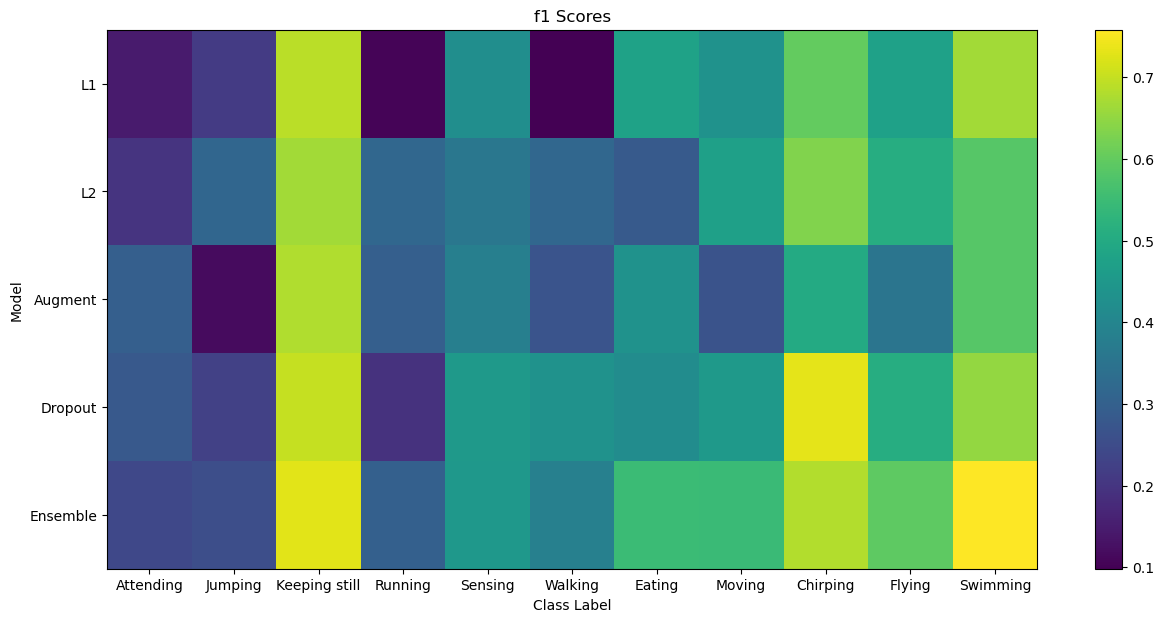

In [57]:
fig, ax = plt.subplots(figsize = (15,7))
plt.pcolormesh(np.array([ensemble_f1, dropout_f1, aug_f1, L2_f1, L1_f1]))
plt.colorbar()
plt.title("f1 Scores")
plt.xlabel("Class Label")
plt.ylabel("Model")
plt.yticks(np.arange(0.5,5.5))
ax.set_yticklabels(['Ensemble', 'Dropout', 'Augment', 'L2', 'L1'])
plt.xticks(np.arange(0.5,11.5))
ax.set_xticklabels(actions)
plt.show()

In [58]:
f1_scores_df

,Attending,Jumping,Keeping still,Running,Sensing,Walking,Eating,Moving,Chirping,Flying,Swimming
L1,0.145833,0.212121,0.689076,0.105263,0.420792,0.098361,0.478632,0.431818,0.598802,0.472222,0.666667
L2,0.197802,0.313725,0.667722,0.315789,0.360759,0.315789,0.282051,0.469697,0.632768,0.509804,0.585366
Augment,0.294574,0.117647,0.680297,0.295082,0.380952,0.269058,0.435374,0.266667,0.500000,0.355140,0.583333
Dropout,0.280702,0.225806,0.699507,0.192308,0.452514,0.431718,0.417582,0.451613,0.730337,0.508772,0.652174
Ensemble,0.242424,0.254545,0.729642,0.297872,0.449198,0.383234,0.547826,0.544474,0.682081,0.595041,0.758170


In [6]:
f1_scores = {"model": ["L1", "L2", "Augment", "Dropout"],
            "0" : []}

average f1_scores for individual models:
- L1: 0.39268981937237635
- L2: 0.422843094234751
- Aug: 0.37982955279175196
- dropout: 0.45845759617741155
- model architecture: N/A

average f1_score for ensemble model: 0.49859161703641686

#### Ignore below... some leftover code from trying to calculate cross entropy loss.

code taken from: https://github.com/pytorch/pytorch/blob/677030b1cb12a2ff32fe85a3c2b9cc547ef47de8/torch/nn/functional.py#L1364

nll_loss(log_softmax(input, 1), target, weight, size_average, ignore_index, reduce)

y_hat = [0.57, 0.05, 0.14, 0.10, 0.14]
target =[1, 0, 0, 0, 0]
y_hat = softmax(y_hat)
-np.sum(target * np.log(y_hat))
1.2586146726011722

def nll_loss(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True):
    r"""The negative log likelihood loss.
    See :class:`~torch.nn.NLLLoss` for details.
    Args:
        input: :math:`(N, C)` where `C = number of classes` or :math:`(N, C, H, W)`
            in case of 2D Loss, or :math:`(N, C, d_1, d_2, ..., d_K)` where :math:`K > 1`
            in the case of K-dimensional loss.
        target: :math:`(N)` where each value is `0 <= targets[i] <= C-1`,
            or :math:`(N, C, d_1, d_2, ..., d_K)` where :math:`K >= 1` for
            K-dimensional loss.
        weight (Tensor, optional): a manual rescaling weight given to each
            class. If given, has to be a Tensor of size `C`
        size_average (bool, optional): By default, the losses are averaged
            over observations for each minibatch. If size_average
            is False, the losses are summed for each minibatch. Default: ``True``
        ignore_index (int, optional): Specifies a target value that is ignored
            and does not contribute to the input gradient. When size_average is
            True, the loss is averaged over non-ignored targets. Default: -100
    Example::
        >>> # input is of size N x C = 3 x 5
        >>> input = autograd.Variable(torch.randn(3, 5))
        >>> # each element in target has to have 0 <= value < C
        >>> target = autograd.Variable(torch.LongTensor([1, 0, 4]))
        >>> output = F.nll_loss(F.log_softmax(input), target)
        >>> output.backward()
    """
    dim = input.dim()
    if torch.is_tensor(weight):
        weight = Variable(weight)
    if dim == 2:
        return torch._C._nn.nll_loss(input, target, weight, size_average, ignore_index, reduce)
    elif dim == 4:
        return torch._C._nn.nll_loss2d(input, target, weight, size_average, ignore_index, reduce)
    elif dim == 3 or dim > 4:
        n = input.size(0)
        c = input.size(1)
        out_size = (n,) + input.size()[2:]
        if target.size()[1:] != input.size()[2:]:
            raise ValueError('Expected target size {}, got {}'.format(
                out_size, input.size()))
        input = input.contiguous().view(n, c, 1, -1)
        target = target.contiguous().view(n, 1, -1)
        if reduce:
            return torch._C._nn.nll_loss2d(input, target, weight, size_average, ignore_index, reduce)
        out = torch._C._nn.nll_loss2d(input, target, weight, size_average, ignore_index, reduce)
        return out.view(out_size)
    else:
        raise ValueError('Expected 2 or more dimensions (got {})'.format(dim))

y_hat = [0.57, 0.05, 0.14, 0.10, 0.14]
target =[1, 0, 0, 0, 0]
y_hat = softmax(y_hat)
-np.sum(target * np.log(y_hat))
1.2586146726011722

def nll_loss(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True):
    r"""The negative log likelihood loss.
    See :class:`~torch.nn.NLLLoss` for details.
    Args:
        input: :math:`(N, C)` where `C = number of classes` or :math:`(N, C, H, W)`
            in case of 2D Loss, or :math:`(N, C, d_1, d_2, ..., d_K)` where :math:`K > 1`
            in the case of K-dimensional loss.
        target: :math:`(N)` where each value is `0 <= targets[i] <= C-1`,
            or :math:`(N, C, d_1, d_2, ..., d_K)` where :math:`K >= 1` for
            K-dimensional loss.
        weight (Tensor, optional): a manual rescaling weight given to each
            class. If given, has to be a Tensor of size `C`
        size_average (bool, optional): By default, the losses are averaged
            over observations for each minibatch. If size_average
            is False, the losses are summed for each minibatch. Default: ``True``
        ignore_index (int, optional): Specifies a target value that is ignored
            and does not contribute to the input gradient. When size_average is
            True, the loss is averaged over non-ignored targets. Default: -100
    Example::
        >>> # input is of size N x C = 3 x 5
        >>> input = autograd.Variable(torch.randn(3, 5))
        >>> # each element in target has to have 0 <= value < C
        >>> target = autograd.Variable(torch.LongTensor([1, 0, 4]))
        >>> output = F.nll_loss(F.log_softmax(input), target)
        >>> output.backward()
    """
    dim = input.dim()
    if torch.is_tensor(weight):
        weight = Variable(weight)
    if dim == 2:
        return torch._C._nn.nll_loss(input, target, weight, size_average, ignore_index, reduce)
    elif dim == 4:
        return torch._C._nn.nll_loss2d(input, target, weight, size_average, ignore_index, reduce)
    elif dim == 3 or dim > 4:
        n = input.size(0)
        c = input.size(1)
        out_size = (n,) + input.size()[2:]
        if target.size()[1:] != input.size()[2:]:
            raise ValueError('Expected target size {}, got {}'.format(
                out_size, input.size()))
        input = input.contiguous().view(n, c, 1, -1)
        target = target.contiguous().view(n, 1, -1)
        if reduce:
            return torch._C._nn.nll_loss2d(input, target, weight, size_average, ignore_index, reduce)
        out = torch._C._nn.nll_loss2d(input, target, weight, size_average, ignore_index, reduce)
        return out.view(out_size)
    else:
        raise ValueError('Expected 2 or more dimensions (got {})'.format(dim))